In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Define some useful functions

#### Functions for cleaning

In [41]:
def split_semicolon_in_rows(data: pd.DataFrame, column: str):
    expanded_rows = []
    for _, row in data.iterrows():
        if not pd.isnull(row[column]):
            if ';' in row[column]:
                split_strings = row[column].split('; ')
                for string in split_strings:
                    split_row = row.copy()
                    split_row[column] = string
                    expanded_rows.append(split_row)
            else:
                expanded_rows.append(row)
    return pd.DataFrame(expanded_rows)

#### Functions for visualization

In [44]:
def draw_simple_bar_plot(data: pd.DataFrame, column: str, title: str, xlabel: str, ylabel: str, rotation_value = 0):
    sources_counts = data[column].value_counts()
    plot = plt.bar(sources_counts.index, sources_counts.values, color=sns.color_palette('viridis', len(sources_counts)))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation_value)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    return plot

In [46]:
def scatterplot_X_vs_Y(data: pd.DataFrame, x: str, y: str, titel: str, xlabel: str, ylabel: str, 
                       show_text_if_more_than_x=0, show_text_if_more_than_y=0, ishue=False, islegend=False, legend_titel='', hue=''):
    if ishue:
        plot = sns.scatterplot(data=df_datasets, 
                x=x, 
                y=y,
                hue=hue, 
                palette='viridis', 
                alpha=0.7)
    else:
        plot = sns.scatterplot(data=df_datasets, 
                x=x, 
                y=y,  
                alpha=0.7)
    
    for i, row in df_datasets.iterrows():
        if (row[y] > show_text_if_more_than_y and 
            row[x] > show_text_if_more_than_x):
            plt.text(
                row[x], 
                row[y], 
                str(row['Dataset']), 
                fontsize=8, 
                alpha=0.7
        )
    plt.title(titel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if islegend:
        plt.legend(title=legend_titel)
    plt.grid(True)
    return plot

### Learn Data

In [49]:
df_datasets = pd.read_csv('datasets.csv', delimiter=';', quotechar='"')

In [51]:
print("Basic Info:\n")
print(df_datasets.info())

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 27 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Dataset                                                                                       50 non-null     object
 1   Number of citations (Google Scholar)                                                          50 non-null     object
 2   Number of Papers (Papers with code since 2020)                                                50 non-null     object
 3   Number of Evaluations (Papers with code API)                                                  50 non-null     object
 4   Music/Speech/Sounds                                                                           50 non-null     object
 5   Link                     

In [53]:
# set up numeric columns
numeric_columns = ['Number of citations (Google Scholar)', 'Number of Papers (Papers with code since 2020)', 
                   'Number of Evaluations (Papers with code API)', 'Score or best score in Paper', 'Size (Hours)', 
                   'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)',
                   'Best Scoure']

df_datasets[numeric_columns] = df_datasets[numeric_columns].replace({',':'.'}, regex=True)
df_datasets[numeric_columns] = df_datasets[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [55]:
# top 5 most cited datasets
most_cited = df_datasets.nlargest(5, 'Number of citations (Google Scholar)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar)']])

# top 5 most used datasets
most_used = df_datasets.nlargest(5, 'Number of Papers (Papers with code since 2020)')
print("\nTop 5 Most Used Datasets:\n")
print(most_used[['Dataset', 'Number of Papers (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)

# datasets by original usecase
orinal_use_case = df_datasets['Original Use Case'].value_counts()
print("\nDatasets by Usecase:\n")
print(orinal_use_case)

# comment why good or bad downloadable
comment_for_downloadable = df_datasets['Download Comment'].value_counts()
print("\nDownload Comments:\n")
print(comment_for_downloadable)


Top 5 Most Cited Datasets:

                                              Dataset  \
5                                         LibriSpeech   
39                                            IEMOCAP   
0                                            AudioSet   
20  EmoDB Dataset (Berlin Database of Emotional Sp...   
34  RAVDESS (Ryerson Audio-Visual Database of Emot...   

    Number of citations (Google Scholar)  
5                                 7494.0  
39                                4124.0  
0                                 3950.0  
20                                3072.0  
34                                2154.0  

Top 5 Most Used Datasets:

         Dataset  Number of Papers (Papers with code since 2020)
5    LibriSpeech                                          1922.0
0       AudioSet                                           591.0
39       IEMOCAP                                           558.0
10     VoxCeleb1                                           490.0
8   Common Voice 

### Clean Data

In [58]:
df_datasets_clean = split_semicolon_in_rows(df_datasets, 'Music/Speech/Sounds')
df_datasets_clean = split_semicolon_in_rows(df_datasets_clean, 'Download Comment')
df_datasets_clean = split_semicolon_in_rows(df_datasets_clean, 'Source')

### Visualization

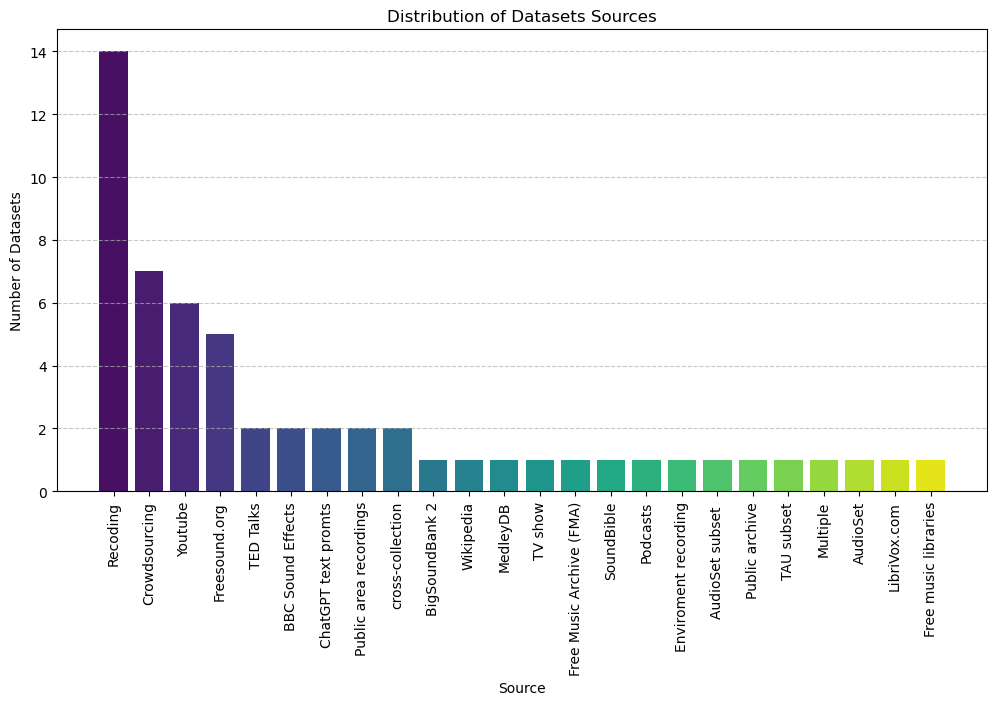

In [61]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_clean, 'Source', 'Distribution of Datasets Sources', 'Source', 'Number of Datasets', 90)

plt.show()

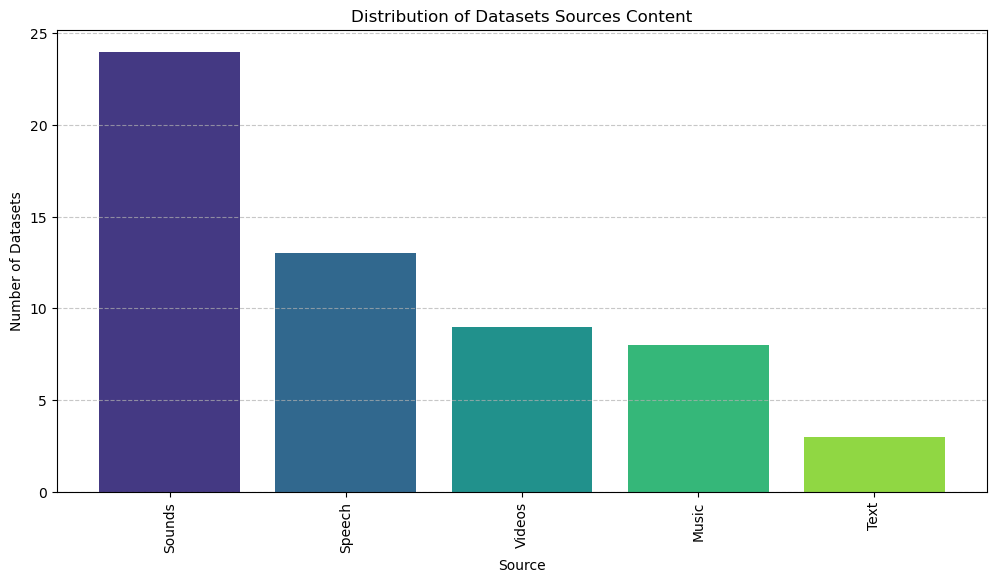

In [63]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_clean, 'Category Source', 'Distribution of Datasets Sources Content', 'Source', 'Number of Datasets', 90)

plt.show()

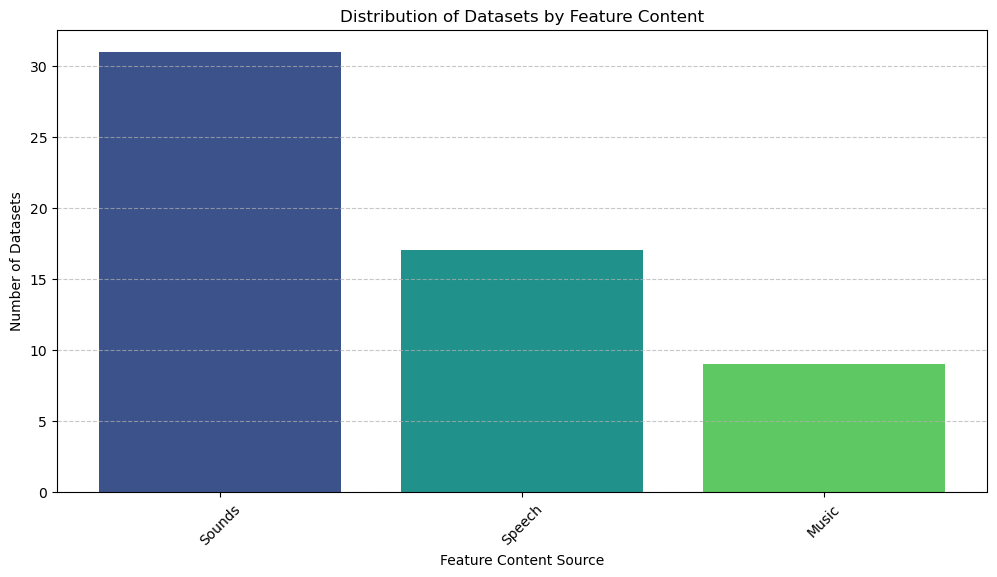

In [65]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_clean, 'Music/Speech/Sounds', 'Distribution of Datasets by Feature Content', 'Feature Content Source', 'Number of Datasets', 45)

plt.show()

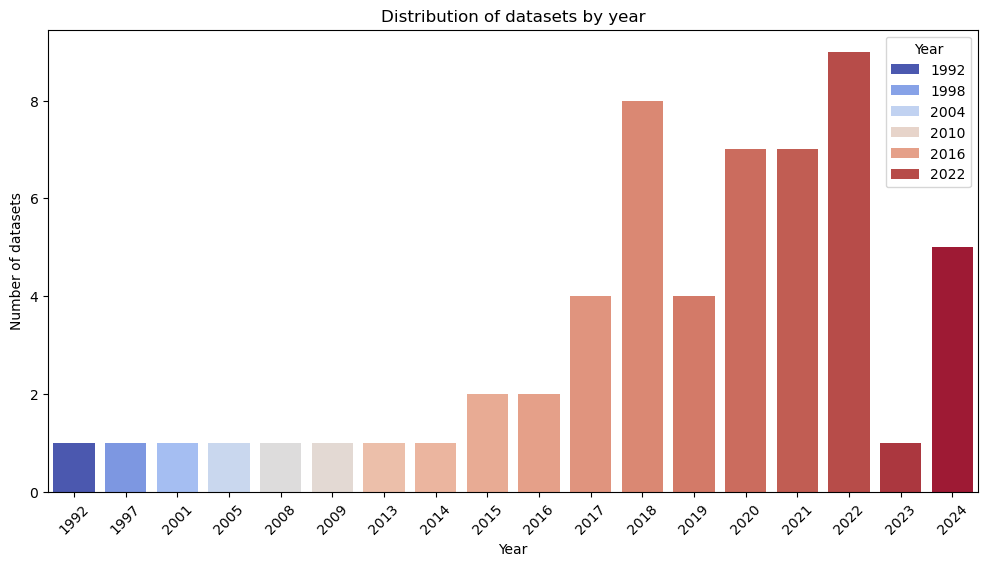

In [67]:
if 'Year' in df_datasets.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(df_datasets_clean, x='Year', palette='coolwarm', hue='Year', order=sorted(df_datasets['Year'].dropna().unique()))
    plt.title('Distribution of datasets by year')
    plt.xlabel('Year')
    plt.ylabel('Number of datasets')
    plt.xticks(rotation=45)
    plt.show()
else:
    print('The “Year” column is missing from the data.')

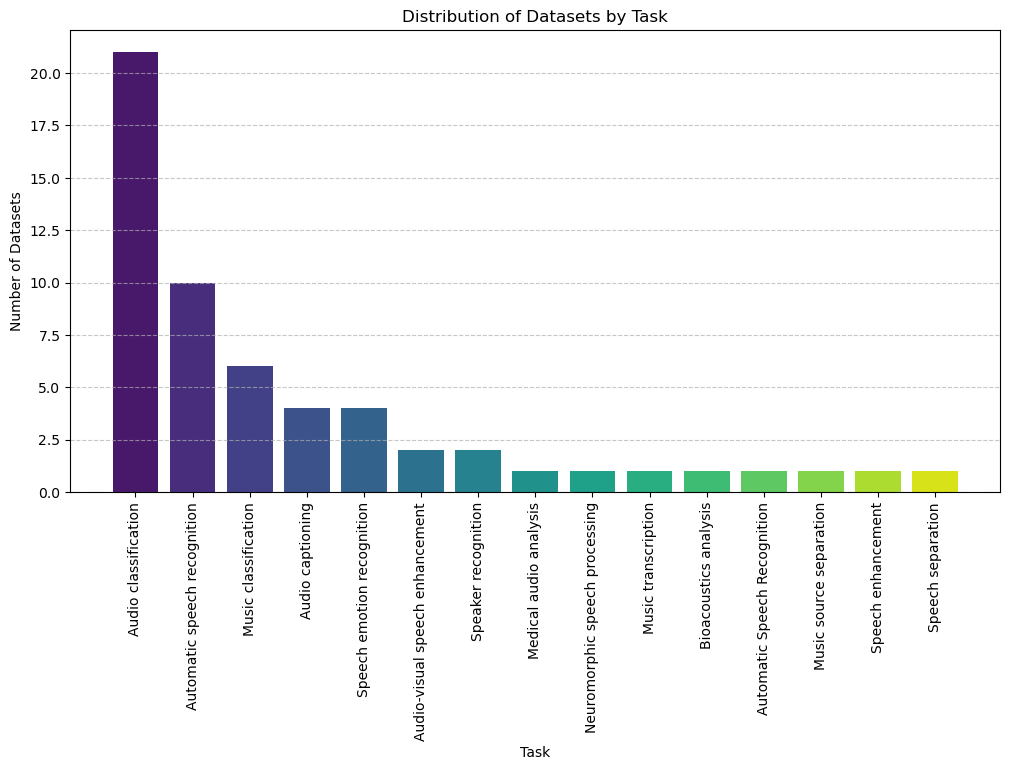

In [69]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_clean, 'Original Use Case', 'Distribution of Datasets by Task', 'Task', 'Number of Datasets', 90)

plt.show()

In [ ]:
print("Top 10 most cited datasets:")
print(df_datasets.nlargest(10, 'Number of citations (Google Scholar since 2020)')[['Dataset', 'Number of citations (Google Scholar since 2020)']])

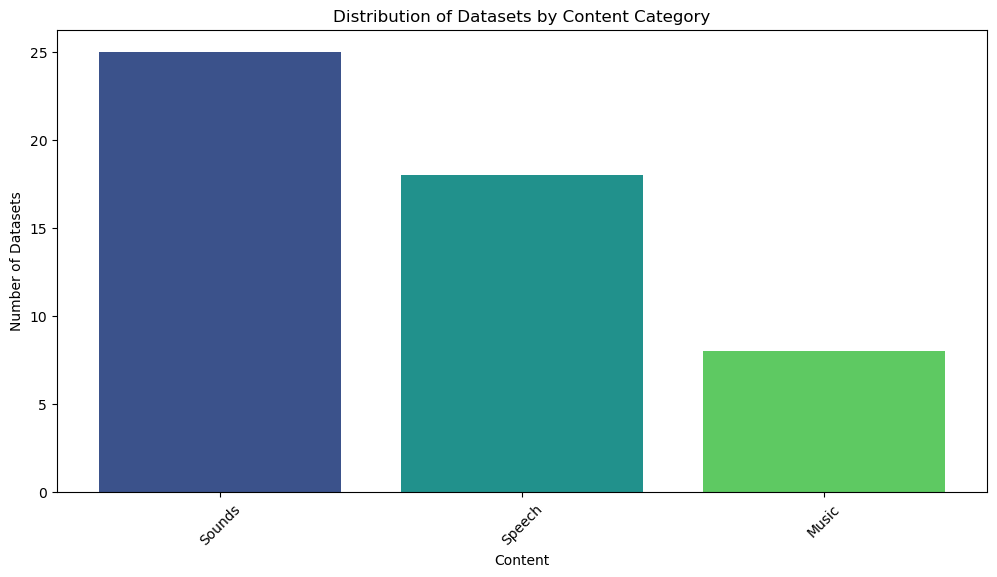

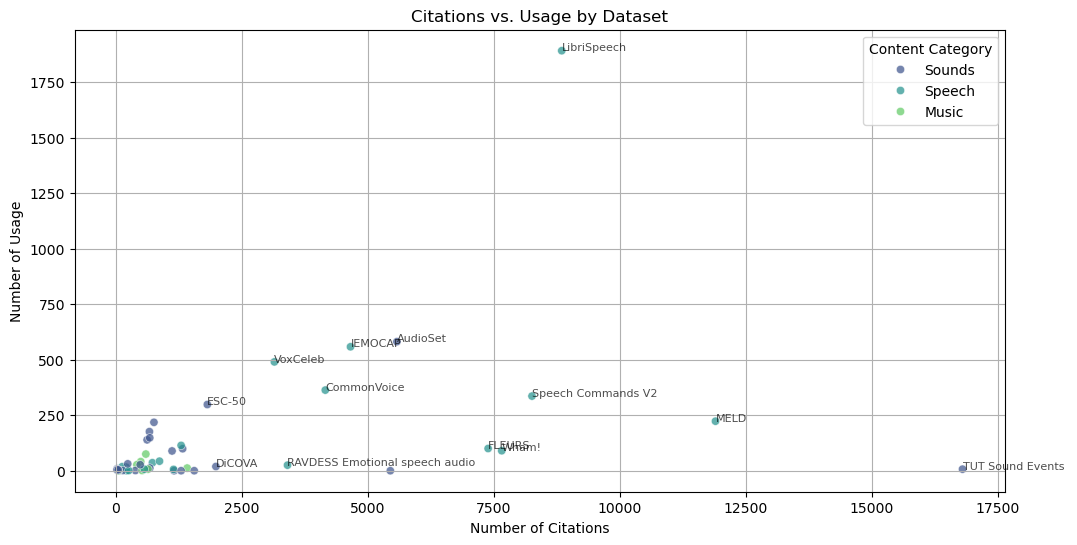

In [9]:


plt.figure(figsize=(12, 6))
plot = scatterplot_X_vs_Y(df_datasets, x='Number of citations (Google Scholar since 2020)', y='Number of usage (Papers with code since 2020)',
                         titel='Citations vs. Usage by Dataset', xlabel='Number of Citations', ylabel='Number of Usage', ishue=True, hue='Music/Speech/Sounds', 
                          islegend=True, legend_titel='Content Category', show_text_if_more_than_x=1800) 
plt.show()

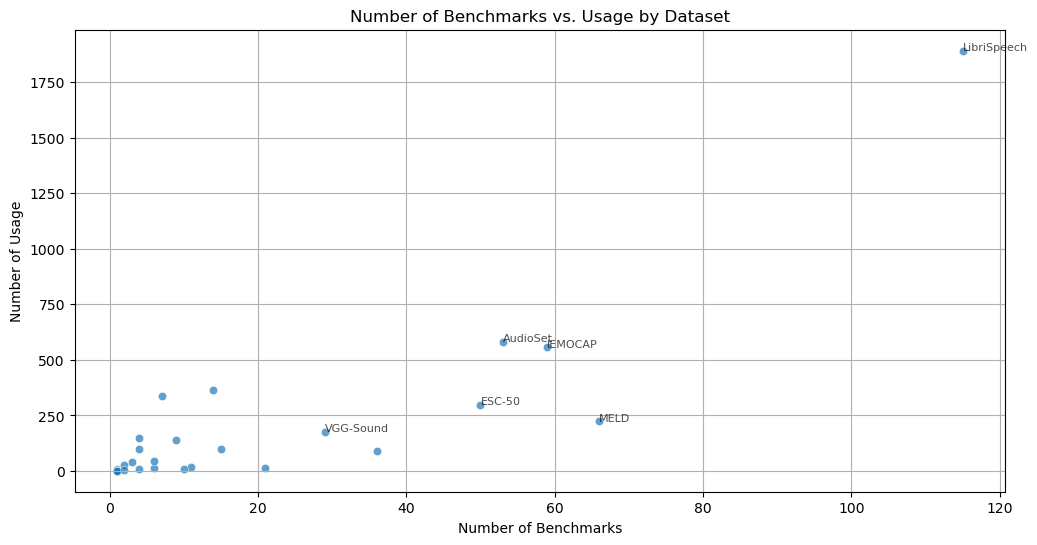

In [10]:
plt.figure(figsize=(12, 6))
plot = scatterplot_X_vs_Y(df_datasets, 'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)', 
                                'Number of usage (Papers with code since 2020)', 'Number of Benchmarks vs. Usage by Dataset',
                               'Number of Benchmarks', 'Number of Usage', 15, 100)

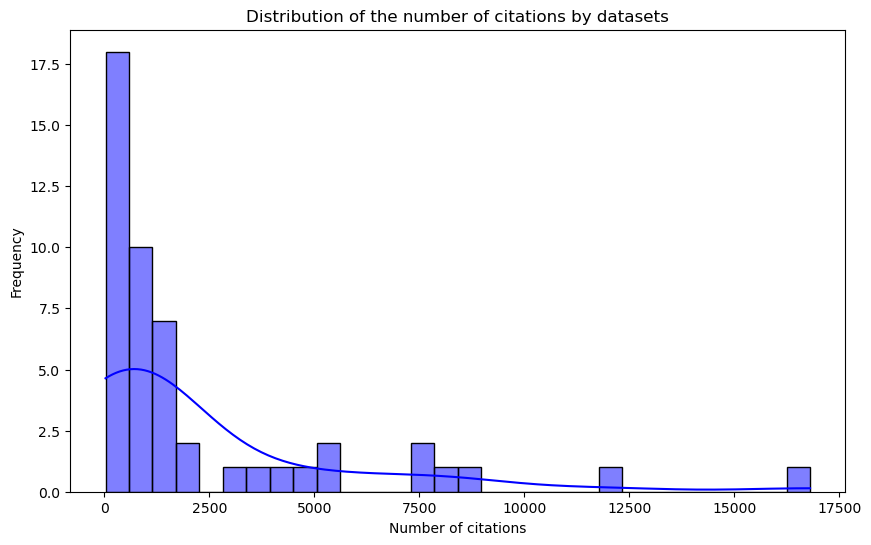

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_datasets['Number of citations (Google Scholar since 2020)'], bins=30, kde=True, color='blue')
plt.title('Distribution of the number of citations by datasets')
plt.xlabel('Number of citations')
plt.ylabel('Frequency')
plt.show()

In [13]:
df_datasets_original_classification = df_datasets[df_datasets['Original Use Case'].str.contains('classification', na=False)]

In [14]:
# top 5 most cited datasets
most_cited = df_datasets_original_classification.nlargest(5, 'Number of citations (Google Scholar since 2020)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar since 2020)']])

# top 5 most used datasets
most_used = df_datasets_original_classification.nlargest(5, 'Number of usage (Papers with code since 2020)')
print("\nTop 5 Most Used Datasets:\n")
print(most_used[['Dataset', 'Number of usage (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets_original_classification['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)


Top 5 Most Cited Datasets:

              Dataset  Number of citations (Google Scholar since 2020)
15  TUT Sound Events                                           16800.0
38             DiCOVA                                           1990.0
4              ESC-50                                           1820.0
42    Coswara Dataset                                           1560.0
3        UrbanSound8K                                           1330.0

Top 5 Most Used Datasets:

                            Dataset  \
4                            ESC-50   
22  EPIC-SOUNDS (EPIC-KITCHENS-100)   
7                            FSD50K   
3                      UrbanSound8K   
45                         CoughVid   

    Number of usage (Papers with code since 2020)  
4                                           298.0  
22                                          148.0  
7                                           139.0  
3                                            99.0  
45                    

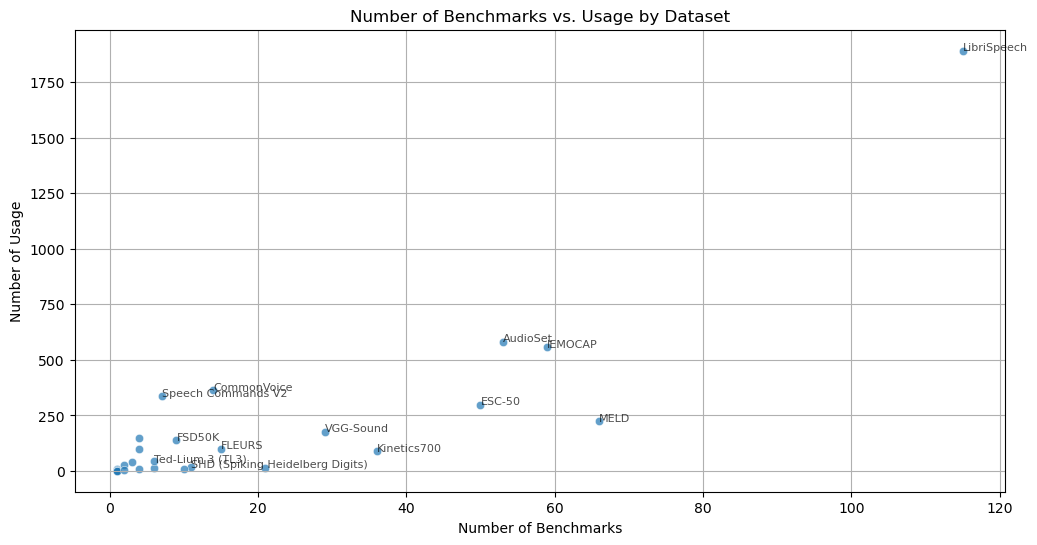

In [15]:
plt.figure(figsize=(12, 6))
plot = scatterplot_X_vs_Y(df_datasets_original_classification, 'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)', 
                                'Number of usage (Papers with code since 2020)', 'Number of Benchmarks vs. Usage by Dataset',
                               'Number of Benchmarks', 'Number of Usage',5,15)
plt.show()

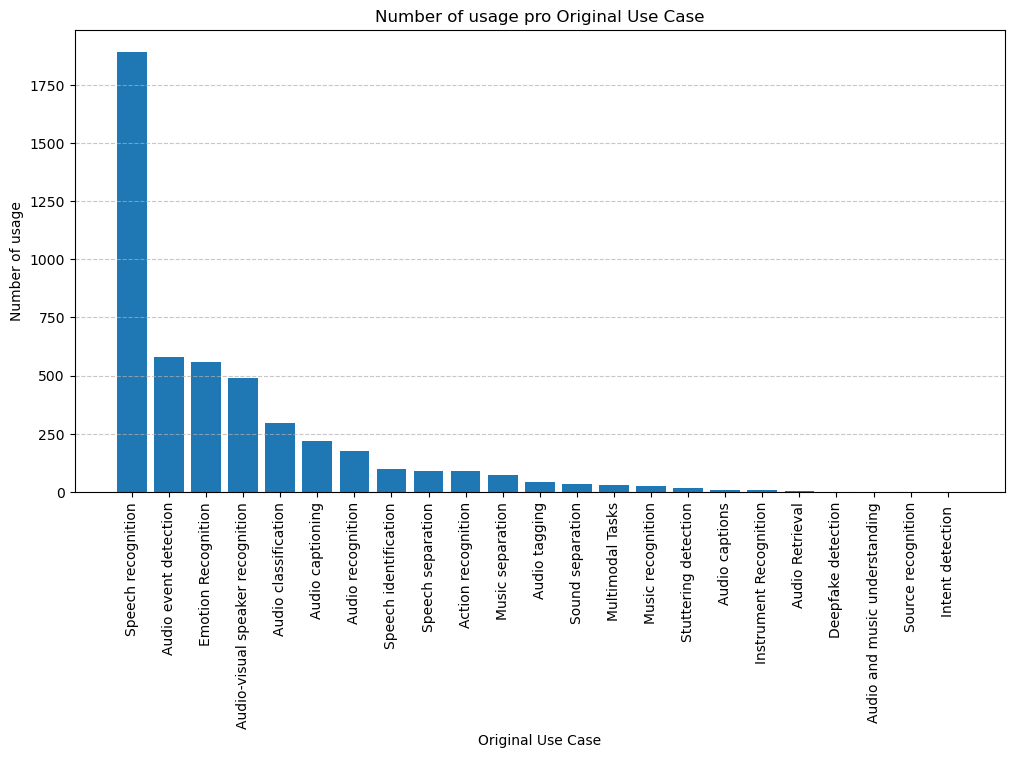

In [16]:
df_datasets_bar_plot = df_datasets.sort_values(by='Number of usage (Papers with code since 2020)', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_datasets_bar_plot['Original Use Case'], df_datasets_bar_plot['Number of usage (Papers with code since 2020)'])
plt.title('Number of usage pro Original Use Case')
plt.xlabel('Original Use Case')
plt.ylabel('Number of usage')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
score_columns = ['Score or best score in Paper', 'Best Scoure']
scores_data = df_datasets[score_columns].notna().sum()
print("Number of data sets with specified values:")
print(scores_data)

Number of data sets with specified values:
Score or best score in Paper    30
Best Scoure                     29
dtype: int64
